In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

from auxiliary.occupation_data import *
from auxiliary.occupation_plot import *

***

## Native German vs 2nd generation of immigrants

In [2]:
#load data
pgen = load_pgen()
ppathl_gen_paren = merge_ppathl_paren(pgen)

In [4]:
warnings.filterwarnings("ignore")

ppathl_gen_paren = convert_country_origin(ppathl_gen_paren)

In [5]:
ppathl_gen_paren.to_csv("ppathl_gen_paren.csv", index=False)
#ppathl_gen_paren= pd.read_csv("ppathl_gen_paren.csv")

In [6]:
ppathl_gen_paren['migback'].value_counts()

1    380280
2    107027
3     30639
Name: migback, dtype: int64

In [6]:
immig_2gen_nat = ppathl_gen_paren[ppathl_gen_paren['migback'].isin([3,1])]
#drop nan country of origin va occ_choices
immig_2gen_nat.drop(immig_2gen_nat[(immig_2gen_nat["country_origin"] == 'invalid')|(immig_2gen_nat['occ_choices'] == 'nan')].index,
                    inplace=True)

In [7]:
immig_2gen_nat.dtypes

pid                          int64
syear                        int64
sex                          int64
gebjahr                      int64
immiyear                     int64
germborn                     int64
migback                      int64
phrf                       float64
phrfe                      float64
cid                          int64
occupation                   int64
employment_status            int64
pglfs                        int64
occupational_change          int64
pgisco88                     int64
full_time_experience       float64
unemployment_experience    float64
years_education            float64
change_in_education          int64
blue_collar                  int32
white_collar                 int32
military                     int32
civil_servant                int32
self_employment              int32
unemployed                   int32
schooling                    int32
apprentice                   int32
occ_choices                 object
fsedu               

***

## Plotting

In [29]:
# 1gen immigrant
#immig_1gen = ppathl_gen_paren[ppathl_gen_paren['migback']==2]

# 2gen immigrant
#immig_2gen = ppathl_gen_paren[ppathl_gen_paren['migback']==3]
immig_2gen['bioage'].value_counts()

17    2303
18    2197
19    1943
20    1733
21    1587
22    1387
23    1330
24    1181
25    1082
26     985
27     951
28     885
29     824
30     812
31     792
33     772
34     769
35     767
32     766
36     723
37     678
38     635
39     573
40     521
41     473
42     440
43     403
44     366
45     334
46     290
47     260
48     244
49     220
50     200
51     188
52     164
53     148
54     134
55     125
56     108
57      96
58      84
59      83
60      70
16      11
15       2
Name: bioage, dtype: int64

In [22]:
immig_2gen['change_in_education'].value_counts()

 0    23748
-2     4783
 2     2108
Name: change_in_education, dtype: int64

In [25]:
immig_2gen['years_education'].value_counts()

 9.0     4475
 10.5    3730
-2.0     3426
 11.5    3221
 10.0    2826
 13.0    2215
-1.0     2064
 12.0    2059
 18.0    2043
 15.0     939
 11.0     851
 14.5     739
 16.0     609
 7.0      516
 13.5     508
 14.0     305
 8.5       60
 17.0      53
Name: years_education, dtype: int64

In [38]:
age18_2gen = immig_2gen[immig_2gen['bioage']<19]

In [39]:
age18_2gen.head(20)

,pid,syear,sex,gebjahr,immiyear,germborn,migback,phrf,phrfe,cid,...,mprofedu,locchildh,fprofstat,mprofstat,morigin,forigin,bioage,forigin_group,morigin_group,country_origin
112,604,2007,1,1990,-2,1,3,1820.38,1765.38,60,...,32,2,-1,421,1,-2,17,invalid,Germany,Germany
113,604,2008,1,1990,-2,1,3,2173.23,2112.38,60,...,32,2,-1,421,1,-2,18,invalid,Germany,Germany
282,1705,2002,2,1985,-2,1,3,328.34,257.81,175,...,28,1,540,620,1,20,17,Others,Germany,Others
283,1705,2003,2,1985,-2,1,3,313.57,252.74,175,...,28,1,540,620,1,20,18,Others,Germany,Others
1480,8605,1995,1,1978,-2,1,3,5509.71,1588.04,868,...,50,1,220,530,1,1,17,Germany,Germany,Germany
1481,8605,1996,1,1978,-2,1,3,5598.54,1648.21,868,...,50,1,220,530,1,1,18,Germany,Germany,Germany
1496,8606,1999,1,1982,-2,1,3,5888.65,2526.73,868,...,27,1,220,530,1,1,17,Germany,Germany,Germany
1497,8606,2000,1,1982,-2,1,3,4801.54,3055.52,868,...,27,1,220,530,1,1,18,Germany,Germany,Germany
1560,9203,1997,2,1980,-2,1,3,2423.44,2637.01,922,...,26,1,530,530,1,-2,17,invalid,Germany,Germany
1561,9203,1998,2,1980,-2,1,3,2495.10,2112.37,922,...,26,1,530,530,1,-2,18,invalid,Germany,Germany


In [40]:
age18_2gen.drop(age18_2gen[age18_2gen['years_education'] <0].index,inplace=True)

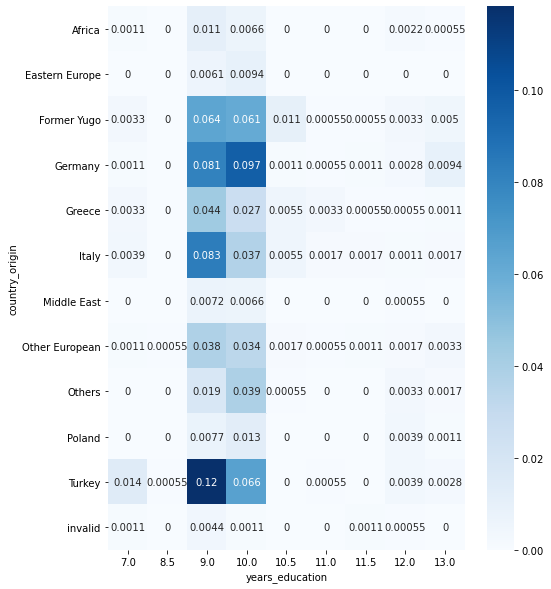

In [41]:
heatmap = pd.crosstab(age18_2gen.country_origin, age18_2gen.years_education, normalize=True)
    
fig = plt.figure(figsize=(8,10))
r = sns.heatmap(heatmap,cmap='Blues', annot=True)

In [9]:
#native
nat_germ = ppathl_gen_paren[ppathl_gen_paren['migback']==1]

In [7]:
immig_1990_2010 = immig_2gen[immig_2gen['syear'].isin([1990,2000,2010])]
mean_age_2immig = immig_1990_2010.groupby(["country_origin",'syear']).apply(lambda x: np.average(x["bioage"], weights=x["phrf"], axis=0)).unstack()
mean_age_2immig.round(2)

syear,1990,2000,2010
country_origin,,,
Africa,NaN,19.40,27.40
Eastern Europe,22.89,26.07,26.30
Former Yugo,20.78,23.06,29.00
Germany,21.51,20.13,25.75
Greece,21.15,26.12,30.58
Italy,20.05,23.38,27.69
Middle East,NaN,NaN,27.87
Other European,23.30,23.23,29.47
Others,17.50,21.07,26.99


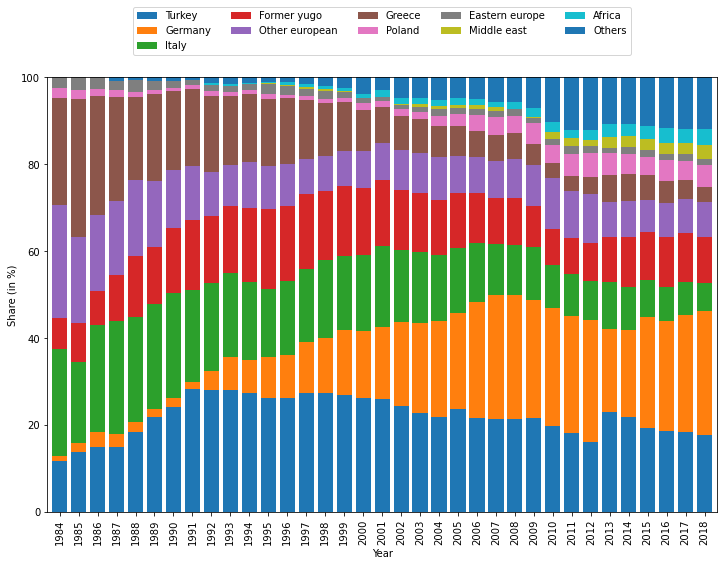

In [8]:
plot_country_origin_by_year(immig_2gen)

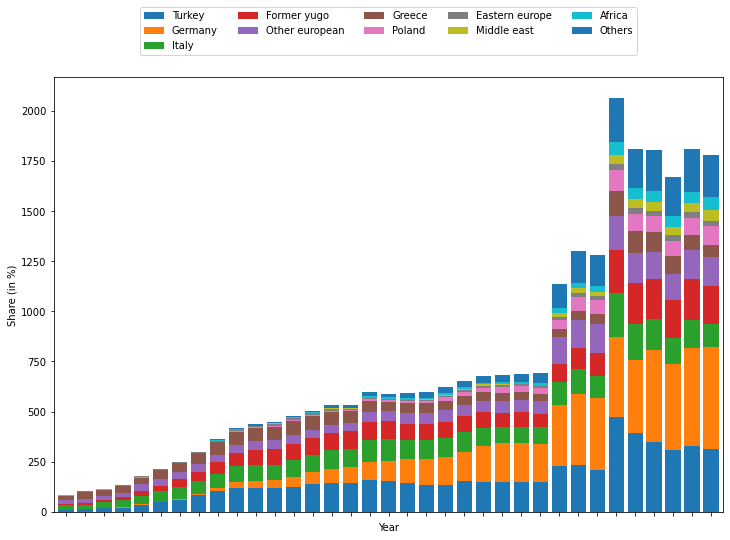

In [48]:
plot_country_origin_by_year(immig_2gen)

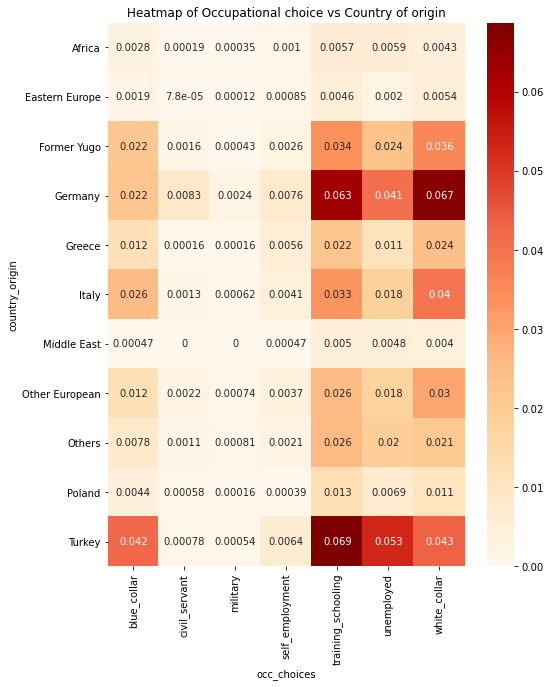

In [9]:
#cols = ['blue_collar','white_collar','schooling','unemployed','military','self_employment','civil_servant']
plot_occupation_by_country_origin(immig_2gen)

Text(0.5, 1.0, 'Heatmap of Occupational choice of Native German')

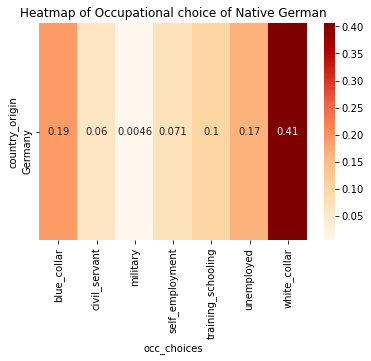

In [10]:
heatmap = pd.crosstab(nat_germ.country_origin,nat_germ.occ_choices, normalize=True)
r = sns.heatmap(heatmap,cmap='OrRd', annot=True)
r.set_title("Heatmap of Occupational choice of Native German")

Text(0.5, 1.0, 'Heatmap of Occupational choice vs Father occupation')

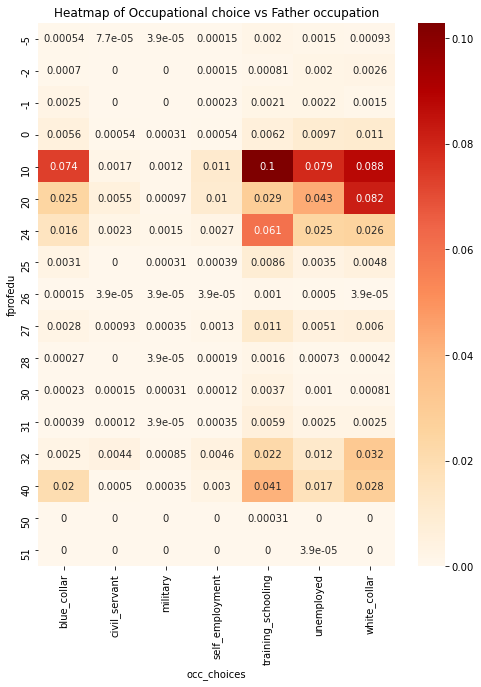

In [11]:
heatmap = pd.crosstab(immig_2gen.fprofedu, immig_2gen.occ_choices, normalize=True)
fig = plt.figure(figsize=(8,10))
r = sns.heatmap(heatmap,cmap='OrRd', annot=True)
    
r.set_title("Heatmap of Occupational choice vs Father occupation")

In [15]:
Turkey = immig_2gen[immig_2gen['country_origin']=="Turkey"]
German = immig_2gen[immig_2gen['country_origin']=="Germany"]

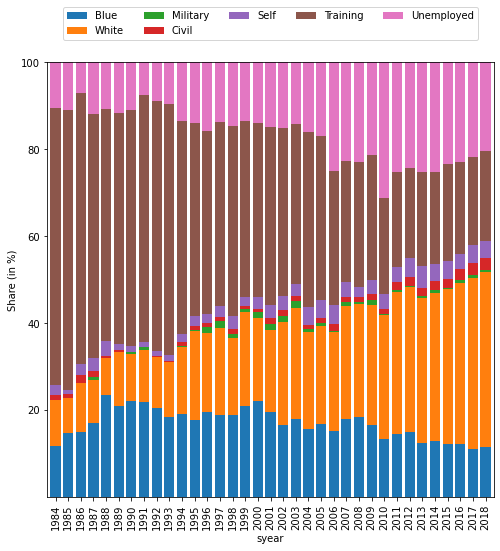

In [11]:
plot_decisions_by_year(immig_2gen)

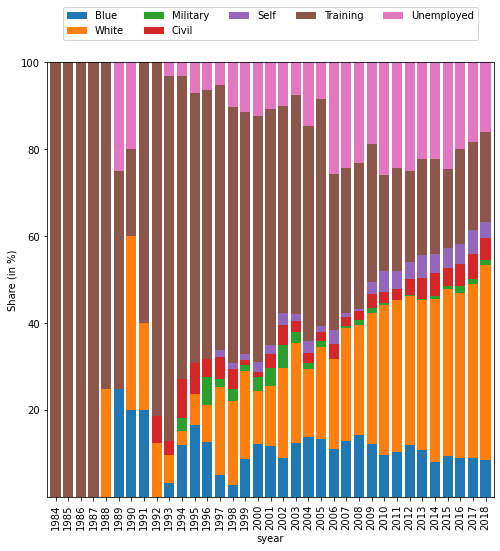

In [14]:
plot_decisions_by_year(German)

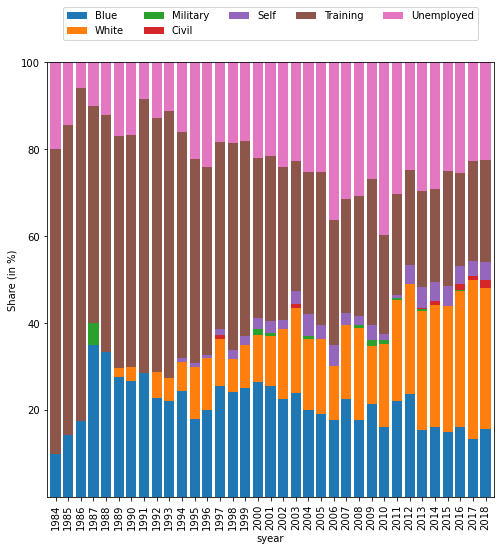

In [15]:
plot_decisions_by_year(Turkey)

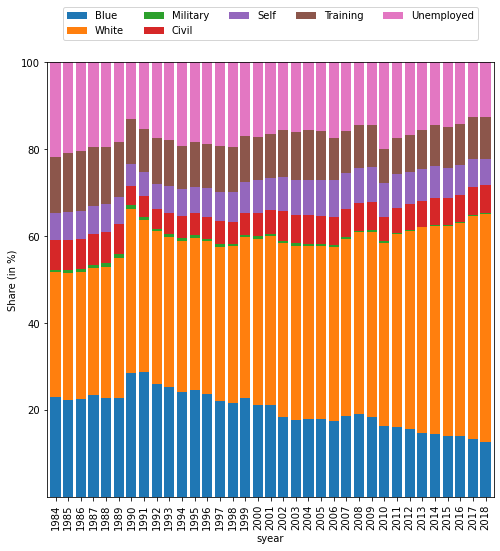

In [16]:
plot_decisions_by_year(nat_germ)

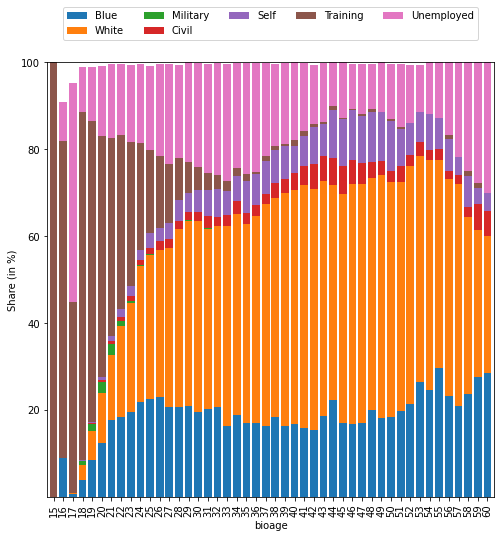

In [14]:
#plot_decisions_by_age(immig_2gen)
plot_decisions_by_age(immig_2gen)

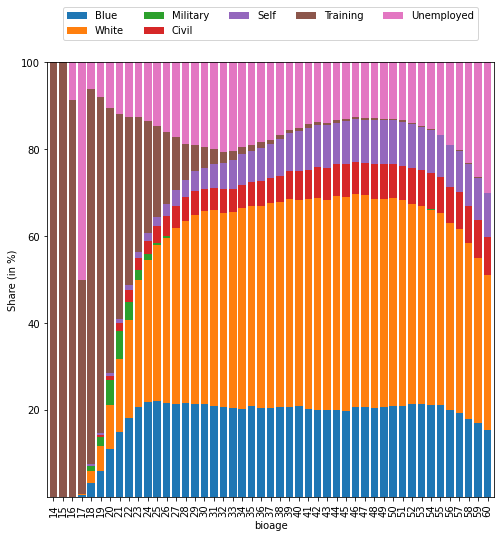

In [16]:
plot_decisions_by_age(nat_germ)

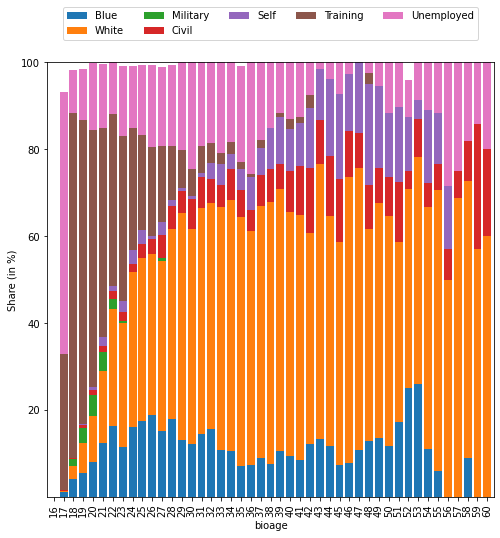

In [17]:
plot_decisions_by_age(German)

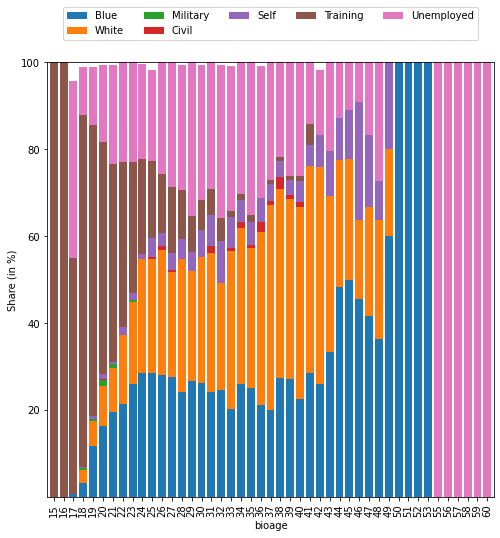

In [18]:
plot_decisions_by_age(Turkey)

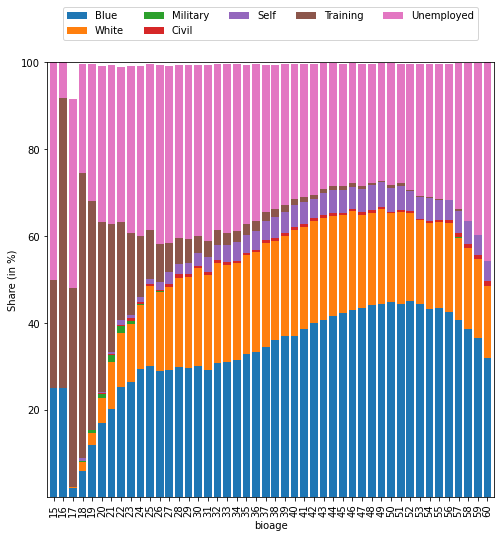

In [19]:
plot_decisions_by_age(immig_1gen)

### Cleaning for regression

In [20]:
_immig_2gen_nat = immig_2gen_nat[['pid','occ_choices','sex','bioage',
                                  'country_origin','migback',
                                  'fsedu','msedu','locchildh',
                                  'fprofedu','mprofedu','fprofstat','mprofstat']]

In [21]:
_immig_2gen_nat['male'] = np.where(_immig_2gen_nat['sex'] == 1, 1, 0)

In [21]:
_immig_2gen_nat['occ_choices'].value_counts()

white_collar          161250
blue_collar            76184
unemployed             67797
training_schooling     46105
self_employment        27948
civil_servant          23008
military                1896
Name: occ_choices, dtype: int64

In [22]:
# replace the negative datapoints with NaN value
_immig_2gen_nat[_immig_2gen_nat.apply(lambda x: x.astype(str).str.contains('-'))] = np.nan

In [23]:
cols = ['fsedu','msedu','fprofedu','mprofedu','fprofstat','mprofstat']
for col in cols:
    _immig_2gen_nat[col] = np.where(_immig_2gen_nat[col] == 0.0, np.nan, _immig_2gen_nat[col])

In [24]:
_immig_2gen_nat.isna().sum()

pid                    0
occ_choices            0
sex                    0
bioage                 0
country_origin         0
migback                0
fsedu              43817
msedu              34246
locchildh          25334
fprofedu           43414
mprofedu           41611
fprofstat          76441
mprofstat         172747
dtype: int64

In [25]:
_immig_2gen_nat.to_csv("occupation_data.csv", index=False)

In [7]:
# Declaring the strings 'a' and 'b':
a = "junk"
b = "clunky"

# Declaring array 'D' with rows = len(a) + 1 and columns = len(b) + 1:
D = [[0 for i in range(len(b) + 1)] for j in range(len(a) + 1)]

# Initialising first row:
for i in range(len(a) + 1):
    D[i][0] = i

# Initialising first column:
for j in range(len(b) + 1):
    D[0][j] = j

for i in range(1, len(a) + 1):
    for j in range(1, len(b) + 1):
        if a[i - 1] == b[j - 1]:
            D[i][j] = D[i - 1][j - 1]
        else:
            # Adding 1 to account for the cost of operation
            insertion = 1 + D[i][j - 1]
            deletion = 1 + D[i - 1][j]
            replacement = 1 + D[i - 1][j - 1]

            # Choosing the best option:
            D[i][j] = min(insertion, deletion, replacement)

print("Levenshtein Distance: ", D[len(a)][len(b)])

Levenshtein Distance:  3
